In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("houseprice.csv")

In [3]:
df.head()

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace,Price
0,1.982,1.0,3,2.00,133,0,14.2212
1,1.676,1.5,3,0.38,14,1,13.4865
2,1.694,2.0,3,0.96,15,1,11.8007
3,1.800,1.0,2,0.48,49,1,13.8297
4,2.088,1.0,3,1.84,29,1,12.9470


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 7 columns):
Living Area    1047 non-null float64
Bathrooms      1047 non-null float64
Bedrooms       1047 non-null int64
Lot Size       1047 non-null float64
Age            1047 non-null int64
Fireplace      1047 non-null int64
Price          1047 non-null float64
dtypes: float64(4), int64(3)
memory usage: 57.3 KB


In [5]:
df.corr()

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace,Price
Living Area,1.000000,0.722649,0.664347,0.200180,-0.263168,0.481436,0.776396
Bathrooms,0.722649,1.000000,0.491798,0.100993,-0.443830,0.444700,0.670189
Bedrooms,0.664347,0.491798,1.000000,0.140682,-0.060598,0.295873,0.471074
Lot Size,0.200180,0.100993,0.140682,1.000000,0.015135,0.052765,0.155284
Age,-0.263168,-0.443830,-0.060598,0.015135,1.000000,-0.248794,-0.363354
Fireplace,0.481436,0.444700,0.295873,0.052765,-0.248794,1.000000,0.460237
Price,0.776396,0.670189,0.471074,0.155284,-0.363354,0.460237,1.000000


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import SelectFromModel

In [7]:
x = df.drop('Price', axis=1)
y = df['Price']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [9]:
lr = LinearRegression()
sel = SelectFromModel(LinearRegression())
sel.fit(x_train,y_train)
#lr.fit(x_train, y_train)
#y_pred = lr.predict(x_test)
#print(r2_score(y_test, y_pred))

SelectFromModel(estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                           n_jobs=None, normalize=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [10]:
sel.get_support()

array([ True,  True, False, False, False, False])

In [11]:
selected_feat= x_train.columns[(sel.get_support())]
len(selected_feat)

2

In [12]:
print(selected_feat)

Index(['Living Area', 'Bathrooms'], dtype='object')


In [13]:
'''x = df[selected_feat]
y = df["Price"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_pred, y_test))'''

'x = df[selected_feat]\ny = df["Price"]\nx_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)\nlr = LinearRegression()\nlr.fit(x_train,y_train)\ny_pred = lr.predict(x_test)\nprint(r2_score(y_pred, y_test))'

In [14]:
#Applying PCA
from sklearn.decomposition import PCA
pca = PCA()
for i in range(6,1,-1):
    pca = PCA(3)
    X_opt = pca.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(X_opt,y,test_size=0.3)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    print(r2_score(y_pred, y_test))



0.14007647755127361
-0.18721926034284397
0.3931480295960986
0.04761716413364614
0.197191021139266


# Data visualization

In [15]:
#Index(['Living Area', 'Bathrooms'], dtype='object')
import matplotlib.pyplot as plt

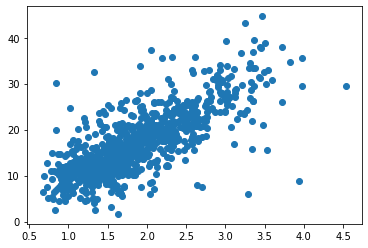

In [16]:
plt.scatter(x= df['Living Area'],y= df['Price'])
plt.show()

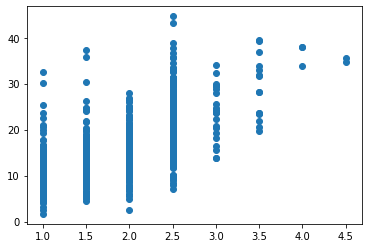

In [17]:
plt.scatter(x= df['Bathrooms'],y= df['Price'])
plt.show()

In [19]:
#Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(2)
#x = df[['Living Area']]
x_poly = pf.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, random_state=1,test_size=0.3)
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_pred, y_test))

0.4847308122857671
